Logistics Data Shape: (15549, 41)

Feature Description:


,variable_name,type,description
0,payment_type,categorical,Type of transaction made
1,profit_per_order,numerical,Earnings per order placed
2,sales_per_customer,numerical,Total sales per customer made per customer
3,category_id,numerical,Product category code
4,category_name,text,Description of the product category
5,customer_city,categorical,City where the customer made the purchase
6,customer_country,categorical,Country where the customer made the purchase
7,customer_id,numerical,Customer ID
8,customer_segment,categorical,"Types of Customers Consumer, Corporate, Home O..."
9,customer_state,categorical,State to which the store where the purchase is...


Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type              15549 non-null  object 
 1   profit_per_order          15549 non-null  float64
 2   sales_per_customer        15549 non-null  float64
 3   category_id               15549 non-null  float64
 4   category_name             15549 non-null  object 
 5   customer_city             15549 non-null  object 
 6   customer_country          15549 non-null  object 
 7   customer_id               15549 non-null  float64
 8   customer_segment          15549 non-null  object 
 9   customer_state            15549 non-null  object 
 10  customer_zipcode          15549 non-null  float64
 11  department_id             15549 non-null  float64
 12  department_name           15549 non-null  object 
 13  latitude                  15549 non-null  floa

Series([], dtype: int64)

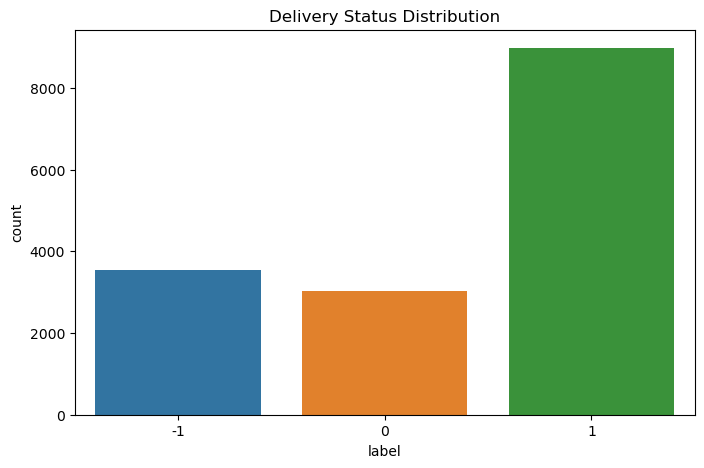

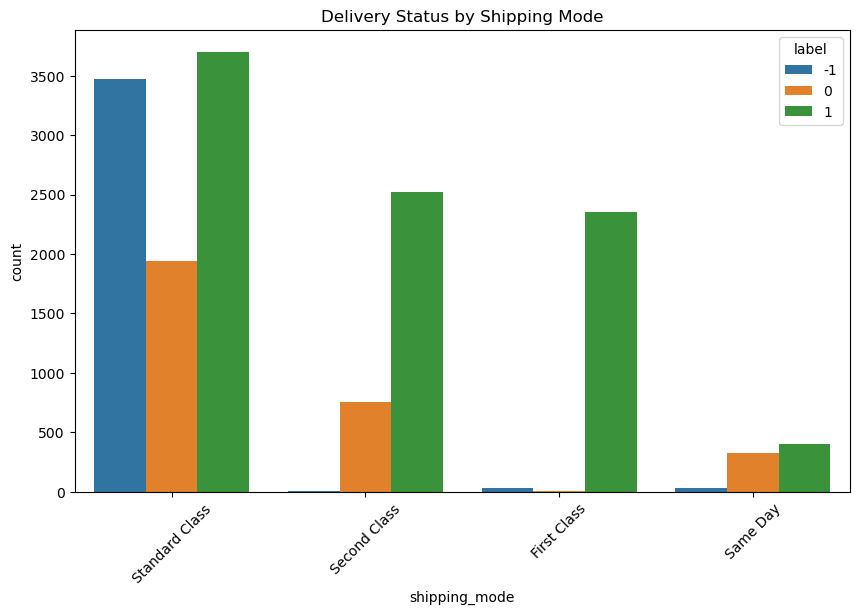

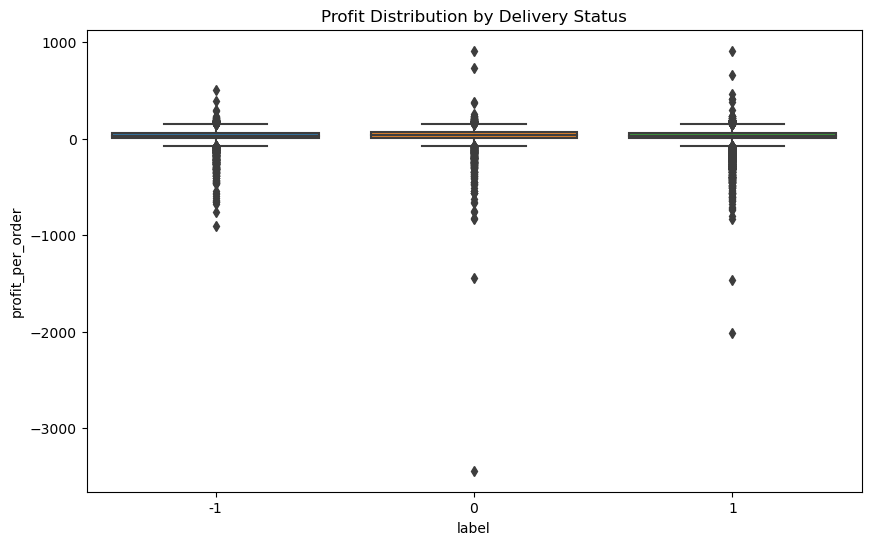

In [ ]:
# %% [markdown]
# # **Logistics Delivery Delay Prediction**
# 
# **Objective**: Predict delivery status (-1=Late, 0=On-time, 1=Early) using machine learning.
# 
# **Datasets**:
# - `logistics.csv`: Main transactional data
# - `feature_description.csv`: Data dictionary

# %% [markdown]
# ## **1. Setup & Data Loading**

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load datasets
logistics_df = pd.read_csv(r"C:\Users\Mr. Louis\Downloads\logistics.csv")
feature_desc = pd.read_csv(r"C:\Users\Mr. Louis\Downloads\feature_description.csv")

# Display dataset info
print("Logistics Data Shape:", logistics_df.shape)
print("\nFeature Description:")
display(feature_desc)

# %% [markdown]
# ## **2. Exploratory Data Analysis (EDA)**

# %%
# Basic info
print("Data Overview:")
logistics_df.info()

# Missing values analysis
print("\nMissing Values:")
missing_values = logistics_df.isnull().sum()
display(missing_values[missing_values > 0])

# Target distribution
plt.figure(figsize=(8,5))
sns.countplot(x='label', data=logistics_df)
plt.title('Delivery Status Distribution')
plt.show()

# %% [markdown]
# ### **Key Relationships Analysis**

# %%
# Shipping mode vs delivery status
plt.figure(figsize=(10,6))
sns.countplot(x='shipping_mode', hue='label', data=logistics_df)
plt.title('Delivery Status by Shipping Mode')
plt.xticks(rotation=45)
plt.show()

# Profit vs delivery status
plt.figure(figsize=(10,6))
sns.boxplot(x='label', y='profit_per_order', data=logistics_df)
plt.title('Profit Distribution by Delivery Status')
plt.show()

# %% [markdown]
# ## **3. Data Preprocessing**

# %%
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Convert dates to datetime
logistics_df['order_date'] = pd.to_datetime(logistics_df['order_date'])
logistics_df['shipping_date'] = pd.to_datetime(logistics_df['shipping_date'])

# Feature engineering: Shipping duration in days
logistics_df['shipping_duration'] = (logistics_df['shipping_date'] - logistics_df['order_date']).dt.days

# Handle missing values
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

numerical_cols = ['profit_per_order', 'sales_per_customer', 'shipping_duration']
categorical_cols = ['payment_type', 'shipping_mode', 'customer_segment']

logistics_df[numerical_cols] = num_imputer.fit_transform(logistics_df[numerical_cols])
logistics_df[categorical_cols] = cat_imputer.fit_transform(logistics_df[categorical_cols])

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# %% [markdown]
# ## **4. Feature Engineering**

# %%
# Create new features
logistics_df['discount_impact'] = logistics_df['order_item_discount'] / logistics_df['order_item_product_price']

high_value_threshold = logistics_df['order_item_total_amount'].quantile(0.9)
logistics_df['is_high_value_order'] = np.where(
    logistics_df['order_item_total_amount'] > high_value_threshold, 1, 0)

# Calculate region delay rates
region_delays = logistics_df.groupby('order_region')['label'].apply(
    lambda x: (x == -1).mean()).reset_index()
region_delays.columns = ['order_region', 'region_delay_rate']
logistics_df = logistics_df.merge(region_delays, on='order_region', how='left')

# Selected features
features = numerical_cols + categorical_cols + [
    'discount_impact', 'is_high_value_order', 'region_delay_rate']

# %% [markdown]
# ## **5. Model Development**

# %%
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

# Prepare data
X = logistics_df[features]
y = logistics_df['label']

# Preprocess features
X_processed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42)

# Model training
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'F1 Score': f1
    })

results_df = pd.DataFrame(results)
display(results_df)

# %% [markdown]
# ## **6. Model Tuning & Evaluation**

# %%
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for XGBoost
params = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [100, 200]
}

grid_search = GridSearchCV(
    XGBClassifier(random_state=42),
    param_grid=params,
    scoring='f1_weighted',
    cv=3
)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred))
print("Tuned Model F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# %% [markdown]
# ## **7. Insights & Feature Importance**

# %%
# Get feature names after one-hot encoding
cat_encoder = preprocessor.named_transformers_['cat']
cat_features = cat_encoder.get_feature_names_out(categorical_cols)
all_features = numerical_cols + list(cat_features) + [
    'discount_impact', 'is_high_value_order', 'region_delay_rate']

# Feature importance
importance = best_model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': all_features,
    'Importance': importance
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Important Features')
plt.show()

# %% [markdown]
# ## **8. Recommendations**
# 
# **Key Findings**:
# 1. Shipping duration and mode significantly impact delivery timeliness
# 2. High-value orders tend to have more delays
# 3. Certain regions show higher delay rates
# 
# **Actionable Recommendations**:
# - Prioritize Standard Class shipping for time-sensitive orders
# - Implement regional-specific logistics strategies
# - Monitor high-value orders more closely
# - Use model predictions for proactive delay prevention